In [1]:
import os
os.getcwd()

'/root/autodl-tmp/Ensemble_oddeven/script'

In [2]:
batch_size=32
epochs = 5

In [3]:
import numpy as np
import torch
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset,TensorDataset
from torch import nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score, accuracy_score
import torch.nn.functional as F
import tqdm
import math
from Model import *
from Myloader import *
from Training import *
from utils import *
from Myloader import *
import matplotlib.pyplot as plt

In [4]:
test_path = "../data/test"

In [5]:
decision_model = torch.load("../model/classifier.pt")
confidence_model = torch.load("../model/meta.pt")

In [6]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()])

In [7]:

test_dataset = CustomDataset(test_path, transform=transform)
test_data_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [8]:
len(test_dataset)

240

In [9]:
decision_model = CNN()
decision_model.load_state_dict(torch.load("../model/classifier.pt"))
decision_model.eval()

CNN(
  (features): ModuleList(
    (0): ConvBN2d(
      (conv): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (features): Sequential(
        (0): ReLU(inplace=True)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ConvBN2d(
      (conv): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (features): Sequential(
        (0): ReLU(inplace=True)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ConvBN2d(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (features): Sequential(
        (0): ReLU(inplace=True)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (4): ConvBN2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1),

In [10]:
confidence_model = Confidence(6, 1)
confidence_model.load_state_dict(torch.load("../model/meta.pt"))
confidence_model.eval()

Confidence(
  (fc1): Linear(in_features=6, out_features=1, bias=True)
)

In [11]:
for epoch in range(epochs):
    #训练
    print('--------------------------------------------------------------------------------------------------------------------------')
    print('Epoch: {}/{} || train Loss: {:.4}'.format(epoch + 1, args.nepoch, trainloss))
    #验证
    valloss, acc1, roc1, acc2, roc2, acc3, roc3 = val_epoch_meta(model1, model2, train_data_loader, device)
    print('Epoch: {}/{} || val Loss: {:.4} || acc1: {:.3} || roc1: {:.3} || acc2: {:.3} || roc2: {:.3}|| acc3: {:.3} || roc3: {:.3}'.format(epoch + 1, args.nepoch, valloss, acc1, roc1, acc2, roc2, acc3, roc3))

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [13]:
all_files_name1, all_files_name2, all_batch_labels1, all_batch_labels2, all_batch_labels3, all_batch_preds1, all_batch_preds2, all_preds3_sig, val_preds_idx1, val_preds_idx2, val_preds_idx3 = test_epoch_meta(decision_model, confidence_model, 
test_data_loader, device) 

In [14]:
all_files_name1, all_files_name2, all_batch_labels1, all_batch_labels2, 
all_batch_labels3, all_batch_preds1, all_batch_preds2, all_preds3_sig, 
val_preds_idx1, val_preds_idx2, val_preds_idx3

(array([1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0,
        2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1,
        2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
        0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2,
        1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
        1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
        1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2,
        2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0,
        0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1,
        2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0]),
 array([2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0,
        1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
        0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1

In [15]:
np.concatenate((val_preds_idx1, val_preds_idx2)).shape

(480,)

In [16]:
import numpy as np
import pandas as pd
np.argmax(all_batch_preds1, axis=1)
# 合并numpy数组
all_batch_labels = np.concatenate((all_batch_labels1, all_batch_labels2))
val_preds_idx = np.concatenate((val_preds_idx1, val_preds_idx2))
all_files_name = all_files_name1 + all_files_name2

# 创建数据框
df = pd.DataFrame({
    'all_files_name': all_files_name,
    'all_batch_labels': all_batch_labels,
    'val_preds_idx': val_preds_idx
})

In [17]:
df['correct_response'] = (df['all_batch_labels'] == df['val_preds_idx']).astype(int)

In [19]:
df

,all_files_name,all_batch_labels,val_preds_idx,correct_response,split_values,even_num,noise
0,2_0_1315_0.5.jpg,2,1,0,"[2, 0, 1315, 0.5]",2,0.5
1,2_0_435_0.5.jpg,2,0,0,"[2, 0, 435, 0.5]",2,0.5
2,2_0_319_0.jpg,2,2,1,"[2, 0, 319, 0]",2,0
3,3_0_929_0.jpg,1,2,0,"[3, 0, 929, 0]",3,0
4,3_0_660_0.5.jpg,1,1,1,"[3, 0, 660, 0.5]",3,0.5
...,...,...,...,...,...,...,...
475,2_0_1455_0.5.jpg,2,0,0,"[2, 0, 1455, 0.5]",2,0.5
476,1_0_109_0.5.jpg,0,0,1,"[1, 0, 109, 0.5]",1,0.5
477,3_0_374_1.jpg,1,1,1,"[3, 0, 374, 1]",3,1
478,2_0_240_0.5.jpg,2,2,1,"[2, 0, 240, 0.5]",2,0.5


In [20]:
# 去掉 .jpg 后缀并以 '_' 分割字符串
df['split_values'] = df['all_files_name'].str.replace('.jpg', '').str.split('_')

# 获取第一个数字作为 even_num 列的值
df['even_num'] = df['split_values'].str[0]

# 获取最后一个数字作为 noise 列的值
df['noise'] = df['split_values'].str[-1]

# 将字符串类型的数字转换为整数
df['even_num'] = df['even_num'].astype(int)
df['noise'] = df['noise']

# 删除临时的 split_values 列
df = df.drop(columns=['split_values'])

In [21]:
df

,all_files_name,all_batch_labels,val_preds_idx,correct_response,even_num,noise
0,2_0_1315_0.5.jpg,2,1,0,2,0.5
1,2_0_435_0.5.jpg,2,0,0,2,0.5
2,2_0_319_0.jpg,2,2,1,2,0
3,3_0_929_0.jpg,1,2,0,3,0
4,3_0_660_0.5.jpg,1,1,1,3,0.5
...,...,...,...,...,...,...
475,2_0_1455_0.5.jpg,2,0,0,2,0.5
476,1_0_109_0.5.jpg,0,0,1,1,0.5
477,3_0_374_1.jpg,1,1,1,3,1
478,2_0_240_0.5.jpg,2,2,1,2,0.5


In [22]:
grouped = df[['even_num', 'noise', 'correct_response']].groupby(['even_num', 'noise']).mean()['correct_response']


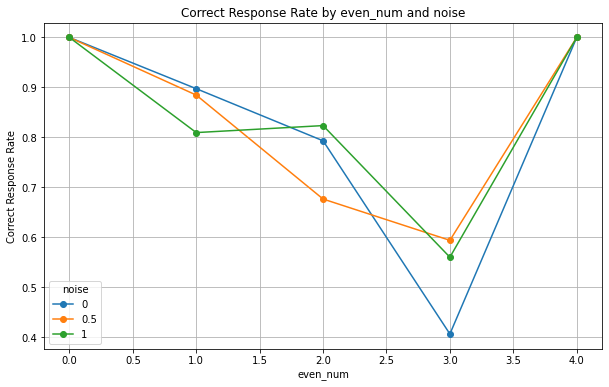

In [23]:
grouped.unstack().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Correct Response Rate by even_num and noise')
plt.xlabel('even_num')
plt.ylabel('Correct Response Rate')
plt.legend(title='noise')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

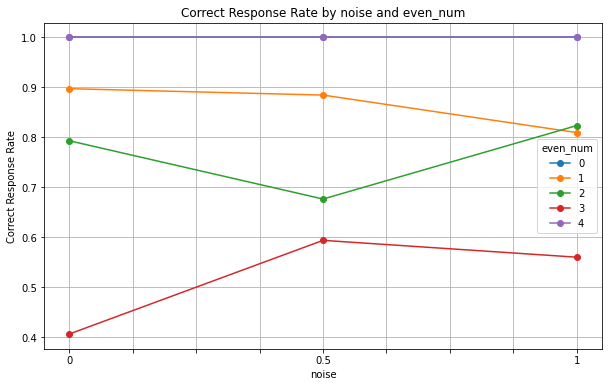

In [ ]:
grouped.unstack().T.plot(kind='line', marker='o', figsize=(10, 6))  # 使用.T转置将even_num放在y轴
plt.title('Correct Response Rate by noise and even_num')
plt.xlabel('noise')
plt.ylabel('Correct Response Rate')
plt.legend(title='even_num')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()